In [159]:
# import the MongoClient class
from pymongo import MongoClient
import pymongo

# import the Pandas library
import pandas as pd

# import the NumPy library as an alias
import numpy as np
import creds


# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


#
import datetime
import re

In [272]:
currtime=datetime.datetime.now()

Taken from
https://alysivji.github.io/importing-mongo-documents-into-pandas-dataframes.html

In [273]:
client = MongoClient("mongodb://storage:27017/", username='judyread', password=creds.judyro,authSource='admin', authMechanism='SCRAM-SHA-1')

In [274]:
db = client["judy"]

In [275]:
col = db.exps

In [276]:
response=col.find().sort('$natural', pymongo.DESCENDING).limit(500)

In [277]:
# test to see if response is populated
#list(response)

In [278]:
client.close()

In [72]:
#for r in response:
#    print(r)

In [279]:
df =  pd.DataFrame(list(response))

In [280]:
df.head()

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxhps,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565438045
1,5d4eb1c1855a2849a93254ef,1,0,1,40,40,52,45,201,155361,...,155361,10048,670,Clem,1,6123,1,1,1,1565438049
2,5d4eb1c1855a2849a93254ee,1,45,1,1,169,176,40,40,172432,...,172432,10009,565,Quinton,1,6105,1,1,1,1565438045
3,5d4eb1c1855a2849a93254ed,1,0,1,40,40,40,45,213,221582,...,221582,10395,654,Bert,1,6105,1,1,1,1565438049
4,5d4eb1c1855a2849a93254ec,1,0,1,60,40,45,44,117,111038,...,111038,10024,652,Lee,1,6109,1,1,1,1565438049


In [83]:
df['name'][0]

'Ida'

In [85]:
df.loc[df['name'] == 'Ida']

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxhps,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565438045
45,5d4eae3d855a28480d4359b1,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565437445
46,5d4eae3d855a28480d4359b0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565436845


In [90]:
type(df.time[0])

str

In [330]:
df['dateStamp'] = pd.to_datetime(df['time'], unit='s')

In [94]:
type(df.dateStamp[0])

pandas._libs.tslibs.timestamps.Timestamp

_id
armor_on
bank
clarity_on
current_con
current_dex
current_int
current_str
current_wis
currenthps
currentmana
experience
gold
harm_multiplier
infravision_on
kick_multiplier
kick_timer
kickbonus
mainmob
maxhps
maxmana
maxmoves
name
regeneration_on
room
sanctuary_on
senselife_on
strength_on
time
dateStamp


In [101]:
mystrs=[]
myints=[]


In [100]:
type(df['currenthps'][0])

str

In [103]:
df.head(2)

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time,dateStamp
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565438045,2019-08-10 11:54:05
1,5d4eb1c1855a2849a93254ef,1,0,1,40,40,52,45,201,155361,...,10048,670,Clem,1,6123,1,1,1,1565438049,2019-08-10 11:54:09


#### how to fix the NaNs. 

In [283]:
# how many NaNs in each column?
df.isnull().sum()

_id                 0
armor_on            0
bank                0
clarity_on          0
current_con         0
current_dex         0
current_int         0
current_str         0
current_wis         0
currenthps          0
currentmana         0
experience          0
gold                0
harm_multiplier    56
infravision_on     10
kick_multiplier    10
kick_timer         10
kickbonus          10
mainmob             0
maxhps              0
maxmana             0
maxmoves            0
name                0
regeneration_on     0
room                0
sanctuary_on        0
senselife_on       10
strength_on        10
time                0
dateStamp           0
dtype: int64

In [284]:
# find column dtype
df.experience.dtype


dtype('O')

In [341]:
# returns index and number - need to strip off the index
df['current_str'].mode()

0    45
dtype: int64

In [300]:
# to strip off the leading index of the .mode() return.
df['current_str'].mode()[0]

'45'

In [293]:
# count total NaNs in df, not a list of nans per column
df.isnull().sum().sum()

60

In [304]:
df['infravision_on'].isnull().sum()

10

In [291]:
# Check the rows that aren't the same as the modal value
df[df['harm_multiplier'] != '15']['harm_multiplier']

Series([], Name: harm_multiplier, dtype: object)

### Cleaning Up NaNs

replacing all NaNs with the mode value of the column

In [305]:
# clean up all NaNs by replacing them with the modal Series value.
# This is fine here because most of the missing data are not very unique - 
# This would be a little better if we did it by player id
#
# must use df[c].isnull().values.any() to check the individual values
for c in df.columns:
    if df[c].isnull().values.any():
        df[c].fillna(df[c].mode()[0], inplace=True)

In [307]:
df.isnull().sum()

_id                0
armor_on           0
bank               0
clarity_on         0
current_con        0
current_dex        0
current_int        0
current_str        0
current_wis        0
currenthps         0
currentmana        0
experience         0
gold               0
harm_multiplier    0
infravision_on     0
kick_multiplier    0
kick_timer         0
kickbonus          0
mainmob            0
maxhps             0
maxmana            0
maxmoves           0
name               0
regeneration_on    0
room               0
sanctuary_on       0
senselife_on       0
strength_on        0
time               0
dateStamp          0
dtype: int64

### Transform Objects to ints and strings

In [308]:
# transform the Objects to ints and strings. need to add booleans
# all entries are Objects - change numbers to ints and strings to strings
for c in df.columns:
    print(c)
    foo = str(df[c][0])
    if foo.isnumeric():
        df[c] = df[c].astype(int)
    elif foo.isalpha():
        df[c] = df[c].astype(str)
    else:
        print(type(df[c][0]))

_id
<class 'bson.objectid.ObjectId'>
armor_on
bank
clarity_on
current_con
current_dex
current_int
current_str
current_wis
currenthps
currentmana
experience
gold
harm_multiplier
infravision_on
kick_multiplier
kick_timer
kickbonus
mainmob
<class 'str'>
maxhps
maxmana
maxmoves
name
regeneration_on
room
sanctuary_on
senselife_on
strength_on
time
dateStamp
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [309]:
df.dtypes

_id                        object
armor_on                    int64
bank                        int64
clarity_on                  int64
current_con                 int64
current_dex                 int64
current_int                 int64
current_str                 int64
current_wis                 int64
currenthps                  int64
currentmana                 int64
experience                  int64
gold                        int64
harm_multiplier             int64
infravision_on              int64
kick_multiplier             int64
kick_timer                  int64
kickbonus                   int64
mainmob                    object
maxhps                      int64
maxmana                     int64
maxmoves                    int64
name                       object
regeneration_on             int64
room                        int64
sanctuary_on                int64
senselife_on                int64
strength_on                 int64
time                        int64
dateStamp     

In [342]:
# get data for just one player
df.loc[df['name'] == 'Ida']['currenthps']

0      212889
45     212889
46     212889
134    212889
180    212889
181    212889
269    212889
315    212889
316    212889
404    212889
450    212889
451    212889
Name: currenthps, dtype: int64

In [310]:
# Get all the rows where name is 'Ida'
df.loc[df['name'] == 'Ida']

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time,dateStamp
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565438045,2019-08-10 11:54:05
45,5d4eae3d855a28480d4359b1,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565437445,2019-08-10 11:44:05
46,5d4eae3d855a28480d4359b0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565436845,2019-08-10 11:34:05
134,5d4eaab9855a2846842ed089,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565436245,2019-08-10 11:24:05
180,5d4ea735855a2846118f9c25,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565435645,2019-08-10 11:14:05
181,5d4ea735855a2846118f9c24,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565435045,2019-08-10 11:04:05
269,5d4ea3b1855a2844ae636a41,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565434445,2019-08-10 10:54:05
315,5d4ea02d855a28443a3c2664,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565433845,2019-08-10 10:44:05
316,5d4ea02d855a28443a3c2663,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565433245,2019-08-10 10:34:05
404,5d4e9ca9855a2842df225877,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565432645,2019-08-10 10:24:05


In [311]:
# how many samples does each player have?
df['name'].value_counts().head(10)

Squeaky    12
Sandra     12
Lee        12
Gypsy      12
Steve      12
Quinton    12
Mary       12
Titas      12
Cappy      12
Una        12
Name: name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

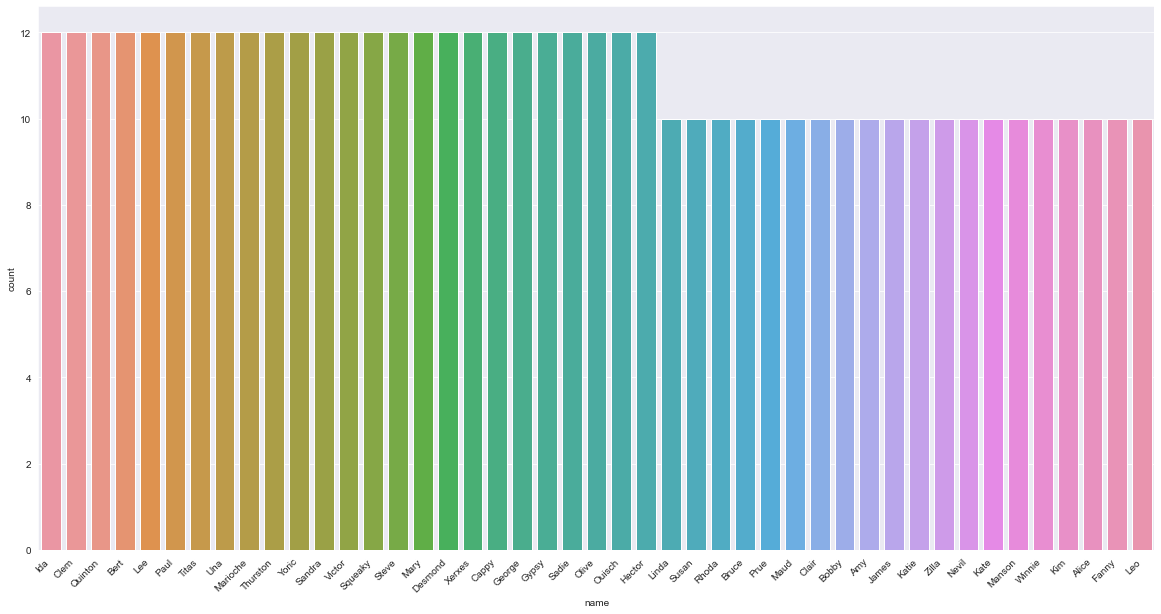

In [313]:
# how many samples does each player have, the graph
plt.figure(figsize=(20,10))
sns.countplot(df['name'])
plt.xticks(rotation=45, ha='right')

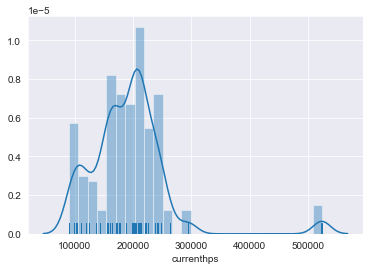

In [321]:
#What's the distribution of hit points for this sample?
sns.distplot(df['currenthps'], rug=True)

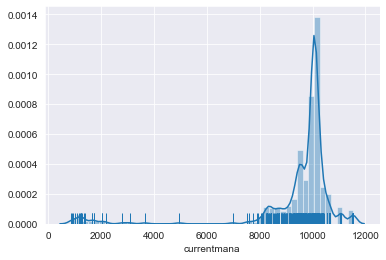

In [322]:
# show current mana
sns.distplot(df['currentmana'], rug=True)

ValueError: cannot reindex from a duplicate axis

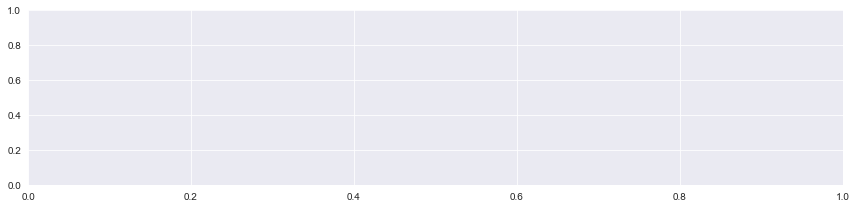

In [340]:
# Not working
# Visualizing Age with FacetGrid and kdeplot using multiple subplots
fig = sns.FacetGrid(df['currenthps'],hue=df['name'],aspect=4)
fig.map(sns.kdeplot,'currenthps',shade=True) # add the kdeplot
oldest = df['currenthps'].max() # what should the upper limit of the x axis be?
fig.set(xlim=(0,oldest)) # set the xlimits from non-negative numbers to oldest
fig.add_legend() # add a legend

(array([  0.,  50., 100.]), <a list of 0 Text major ticklabel objects>)

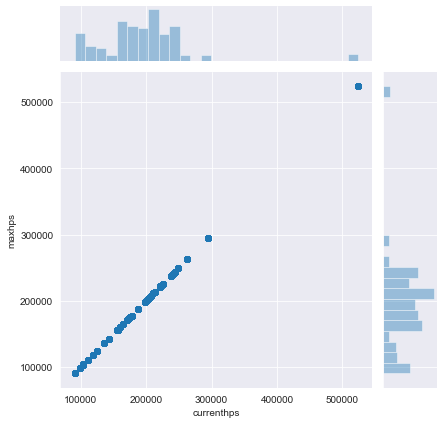

In [339]:
sns.jointplot('currenthps','maxhps',data=df)
plt.xticks(rotation=45, ha='right')

In [338]:
df['currenthps'].mean()

192696.326

In [337]:
df['maxhps'].mean()

192714.876

In [182]:
df.columns

Index(['_id', 'armor_on', 'bank', 'clarity_on', 'current_con', 'current_dex',
       'current_int', 'current_str', 'current_wis', 'currenthps',
       'currentmana', 'experience', 'gold', 'harm_multiplier',
       'infravision_on', 'kick_multiplier', 'kick_timer', 'kickbonus',
       'mainmob', 'maxhps', 'maxmana', 'maxmoves', 'name', 'regeneration_on',
       'room', 'sanctuary_on', 'senselife_on', 'strength_on', 'time',
       'dateStamp'],
      dtype='object')

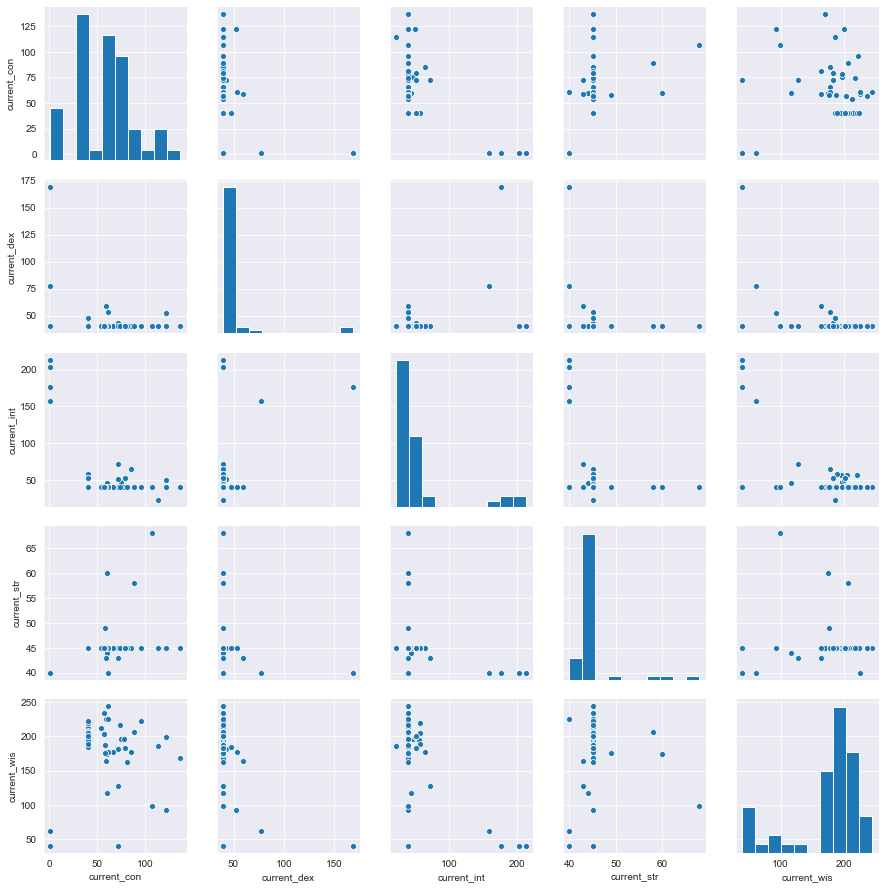

In [183]:
sns.pairplot(df[['current_con','current_dex','current_int','current_str','current_wis']])

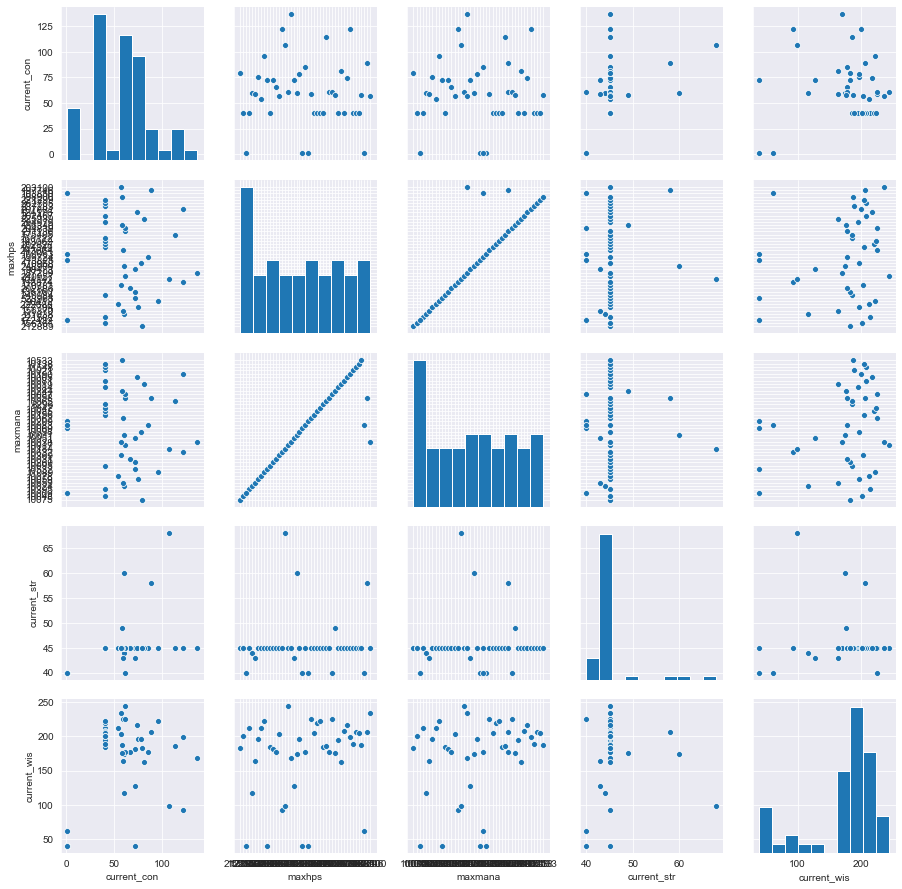

In [184]:
sns.pairplot(df[['current_con','maxhps','maxmana','current_str','current_wis']])

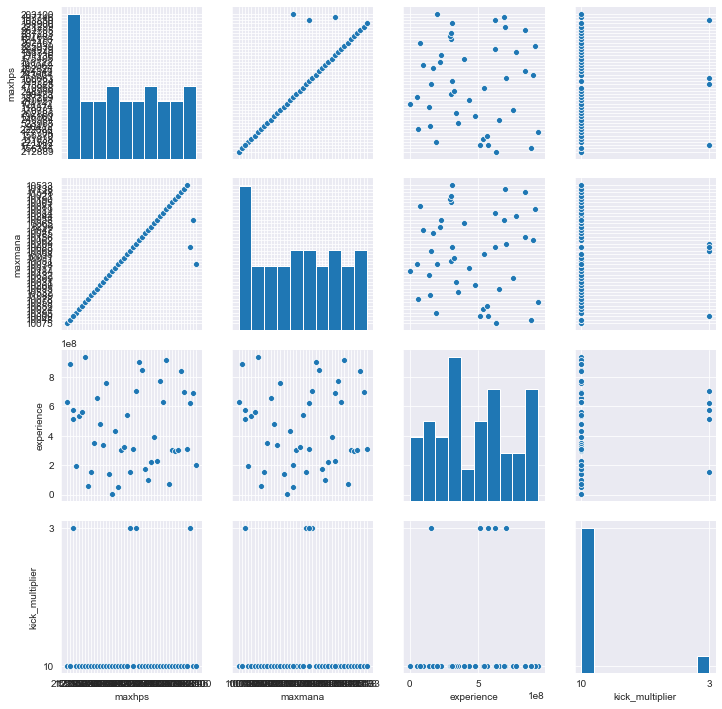

In [188]:
sns.pairplot(df[['maxhps','maxmana','experience','kick_multiplier']].dropna())

In [194]:
df.dtypes

_id                        object
armor_on                    int64
bank                        int64
clarity_on                  int64
current_con                 int64
current_dex                 int64
current_int                 int64
current_str                 int64
current_wis                 int64
currenthps                  int64
currentmana                 int64
experience                  int64
gold                        int64
harm_multiplier            object
infravision_on             object
kick_multiplier            object
kick_timer                 object
kickbonus                  object
mainmob                    object
maxhps                     object
maxmana                    object
maxmoves                   object
name                       object
regeneration_on            object
room                       object
sanctuary_on               object
senselife_on               object
strength_on                object
time                       object
dateStamp     

In [318]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

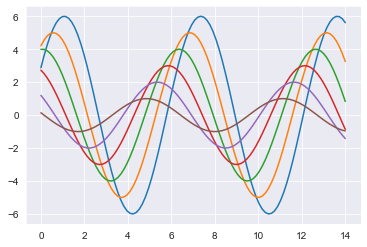

In [319]:
sinplot()

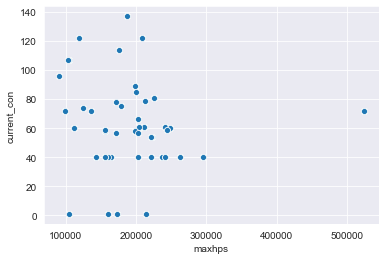

In [325]:
sns.scatterplot(df['maxhps'],df['current_con'])

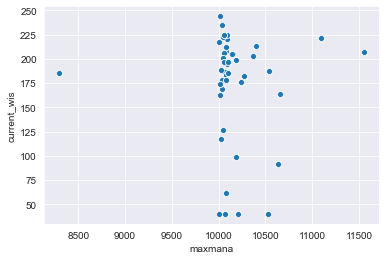

In [326]:
sns.scatterplot(df['maxmana'],df['current_wis'])

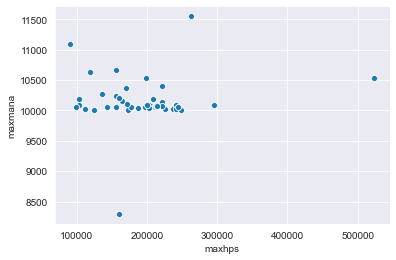

In [327]:
sns.scatterplot(df['maxhps'],df['maxmana'])

In [ ]:
']

In [329]:
# what stats correlate?
df.corr()

,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,currentmana,...,kickbonus,maxhps,maxmana,maxmoves,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
armor_on,1.000000,-0.038163,1.000000,0.000111,-0.035438,-0.057687,-0.160866,0.135611,0.024839,0.048459,...,-0.048673,0.024798,-0.026767,-0.038281,1.000000,-0.599379,1.000000,NaN,NaN,0.026844
bank,-0.038163,1.000000,-0.038163,0.047689,-0.017661,-0.112167,-0.053373,-0.299589,0.640387,-0.566013,...,0.046212,0.640601,0.240196,0.268487,-0.038163,0.058015,-0.038163,NaN,NaN,-0.027778
clarity_on,1.000000,-0.038163,1.000000,0.000111,-0.035438,-0.057687,-0.160866,0.135611,0.024839,0.048459,...,-0.048673,0.024798,-0.026767,-0.038281,1.000000,-0.599379,1.000000,NaN,NaN,0.026844
current_con,0.000111,0.047689,0.000111,1.000000,-0.342114,-0.622368,0.388030,0.241273,-0.088164,-0.043509,...,-0.607542,-0.088386,0.140542,-0.069168,0.000111,0.194809,0.000111,NaN,NaN,-0.006395
current_dex,-0.035438,-0.017661,-0.035438,-0.342114,1.000000,0.477637,-0.227271,-0.443082,-0.119859,0.058398,...,0.562103,-0.119670,-0.059780,0.029160,-0.035438,-0.143572,-0.035438,NaN,NaN,-0.021366
current_int,-0.057687,-0.112167,-0.057687,-0.622368,0.477637,1.000000,-0.375361,-0.710623,-0.125782,0.093603,...,0.957001,-0.125501,-0.064570,-0.010303,-0.057687,-0.206378,-0.057687,NaN,NaN,-0.036219
current_str,-0.160866,-0.053373,-0.160866,0.388030,-0.227271,-0.375361,1.000000,0.096641,-0.031171,-0.026715,...,-0.359782,-0.031331,-0.019481,-0.041599,-0.160866,0.180177,-0.160866,NaN,NaN,0.000450
current_wis,0.135611,-0.299589,0.135611,0.241273,-0.443082,-0.710623,0.096641,1.000000,-0.043738,0.359939,...,-0.769044,-0.044103,-0.021909,-0.220950,0.135611,0.131068,0.135611,NaN,NaN,0.057771
currenthps,0.024839,0.640387,0.024839,-0.088164,-0.119859,-0.125782,-0.031171,-0.043738,1.000000,-0.417307,...,-0.013734,0.999999,0.086106,-0.153753,0.024839,0.127955,0.024839,NaN,NaN,0.010725
currentmana,0.048459,-0.566013,0.048459,-0.043509,0.058398,0.093603,-0.026715,0.359939,-0.417307,1.000000,...,-0.012145,-0.417528,0.150124,-0.261343,0.048459,-0.052692,0.048459,NaN,NaN,0.023270


In [331]:
df['dateStamp'].head()

0   2019-08-10 11:54:05
1   2019-08-10 11:54:09
2   2019-08-10 11:54:05
3   2019-08-10 11:54:09
4   2019-08-10 11:54:09
Name: dateStamp, dtype: datetime64[ns]

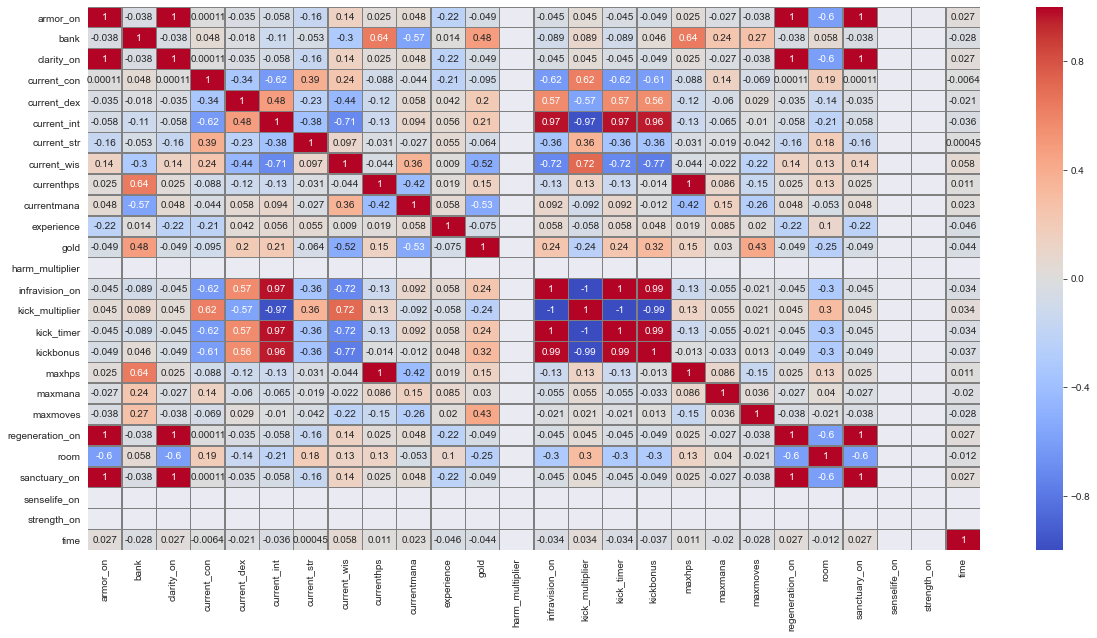

In [336]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, linewidths=.5, linecolor='grey')
